In [3]:
# %matplotlib inline
import pandas as pd #Pandas para usar dataframes
import matplotlib.pyplot as plt #Para graficar
import matplotlib.cm as cm #Para graficar el silhouette
import seaborn as sns #Para graficar
import numpy as np #Para realizar operaciones númericas con matrices y arrays
from sklearn import datasets #sklearn es LA biblioteca de machine learning de python
from sklearn.cluster import KMeans, DBSCAN #Para usar kmeans
from sklearn.preprocessing import StandardScaler #Para estandarizar nuestros datos
from sklearn.metrics import silhouette_samples, silhouette_score #Para el coeficiente de silhouette
from sklearn.cluster import AgglomerativeClustering #Para clustering jerárquico
from sklearn.metrics import pairwise_distances #Para las distancias a pares
from scipy.cluster.hierarchy import dendrogram, cophenet, linkage #Para graficar los dendrogramas y calcular el coeficiente cofenetico
from scipy.cluster import hierarchy #Para graficar los dendrogramas
from scipy.spatial.distance import pdist #Para calcular la distancia con el coeficiente cofenetico
#import community as community_louvain #Para louvain
#import networkx as nx #Para grafos

Paso 1: cargar los datos

stock_data = pd.read_csv("dataset_clustering_teorico.csv")
stock_data.head()
Paso 1 Inspeccioná el DataFrame y caracterizalo

Paso 2 Normaliza los datos y guardálos en una variable llamada stock_data_normalizado

Paso 3 Aplicá el método k-means usando k=14

Paso 4 Evaluá tus resultados

In [4]:
stock_data = pd.read_csv("/Users/niki/Downloads/dataset_clustering_teorico.csv",sep ="," ) 
stock_data
stock_data.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [5]:
stock_data.describe()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.277166,0.079334,-0.327333,-0.081833,0.475168,-0.291500,-0.101167,0.528000,0.303666,-0.674500,...,0.765817,0.906833,1.016166,-0.152833,0.177250,0.543083,0.311498,-0.083667,0.280001,0.274500
std,0.679217,0.793585,2.380234,2.138296,1.433856,1.118415,1.121530,1.508851,1.047321,1.831198,...,1.788782,1.824133,4.745266,1.823094,1.308681,4.159633,1.868696,2.118430,0.922479,3.488336
min,-2.350006,-3.189984,-17.599998,-15.299993,-2.020004,-4.770012,-7.170008,-0.469994,-1.790001,-13.340041,...,-0.810002,-4.200020,-1.020004,-8.159984,-6.540016,-5.029984,-6.320089,-13.620034,-1.760009,-19.589981
25%,0.040002,-0.167501,-0.212501,-0.122502,-0.025000,-0.340000,-0.185000,0.017501,-0.082495,-0.605000,...,0.095002,0.280000,-0.060001,-0.332497,-0.015002,-0.279998,-0.197503,-0.202501,-0.097504,-0.035000
50%,0.295001,0.010001,-0.005000,0.084993,0.150001,-0.059997,0.070000,0.205002,0.139999,-0.359999,...,0.335004,0.454999,0.035002,0.000000,0.174999,-0.084999,0.025001,-0.005000,0.070002,0.149998
75%,0.580000,0.325004,0.259999,0.380000,0.555002,0.112501,0.330001,0.507500,0.392499,-0.137500,...,0.805000,1.139999,0.345000,0.192502,0.577495,0.147498,0.382500,0.299998,0.400001,0.422499
max,3.029999,3.139999,1.630005,3.349991,10.020000,3.179996,1.479996,10.599985,5.949977,0.839996,...,12.160008,11.949997,34.830004,9.590019,4.820008,30.409929,10.140000,4.790009,5.910034,17.139948


In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Columns: 964 entries, Unnamed: 0 to 2013-10-29
dtypes: float64(963), object(1)
memory usage: 452.0+ KB


In [7]:
stock_data.drop_duplicates(inplace=True)
stock_data.info()#no hay duplicados

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Columns: 964 entries, Unnamed: 0 to 2013-10-29
dtypes: float64(963), object(1)
memory usage: 452.3+ KB


In [10]:
stock_data1= stock_data.set_index('Unnamed: 0')
stock_data1.head()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [28]:
stock_data1.info(max_cols=1000)

at64
 488  2011-12-08  60 non-null     float64
 489  2011-12-09  60 non-null     float64
 490  2011-12-12  60 non-null     float64
 491  2011-12-13  60 non-null     float64
 492  2011-12-14  60 non-null     float64
 493  2011-12-15  60 non-null     float64
 494  2011-12-16  60 non-null     float64
 495  2011-12-19  60 non-null     float64
 496  2011-12-20  60 non-null     float64
 497  2011-12-21  60 non-null     float64
 498  2011-12-22  60 non-null     float64
 499  2011-12-23  60 non-null     float64
 500  2011-12-27  60 non-null     float64
 501  2011-12-28  60 non-null     float64
 502  2011-12-29  60 non-null     float64
 503  2011-12-30  60 non-null     float64
 504  2012-01-03  60 non-null     float64
 505  2012-01-04  60 non-null     float64
 506  2012-01-05  60 non-null     float64
 507  2012-01-06  60 non-null     float64
 508  2012-01-09  60 non-null     float64
 509  2012-01-10  60 non-null     float64
 510  2012-01-11  60 non-null     float64
 511  2012-01-12  60 non-null

In [68]:
Q1 = stock_data1.quantile(0.25)

Q3 = stock_data1.quantile(0.75)

IQR = Q3 - Q1

print(IQR)

2010-01-04    0.539998
2010-01-05    0.492504
2010-01-06    0.472500
2010-01-07    0.502502
2010-01-08    0.580002
                ...   
2013-10-23    0.427496
2013-10-24    0.580003
2013-10-25    0.502499
2013-10-28    0.497505
2013-10-29    0.457499
Length: 963, dtype: float64


46


23.33333333333333

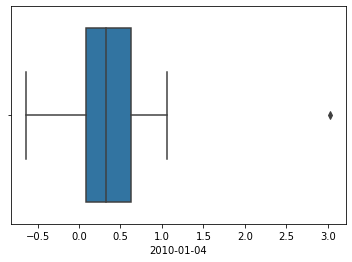

In [66]:
for i in stock_data1.columns:
    stock_filtrado = stock_data1[(stock_data1[i] < stock_data1[i].quantile(.85)) & (stock_data1[i] > stock_data1[i].quantile(.07))]
    
print(len(stock_filtrado))


sns.boxplot(x=stock_filtrado["2010-01-04"])

100-(len(stock_filtrado)*100/len(stock_data1))
#Se perdio un 12%, de 60 quedaron 53 datos.

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
stock_data_normalizado= scaler.fit_transform(stock_data1)

In [51]:
stock_data_normalizado

array([[ 0.4496197 , -0.38038084, -1.30603921, ..., -2.51168159,
         0.61220263, -5.74259972],
       [-1.36172667, -0.92679173,  0.04971049, ...,  0.02078649,
        -0.74336873,  0.11144388],
       [-3.90058279,  1.50032885, -0.85695009, ...,  2.32002256,
        -2.23010689,  1.00184359],
       ...,
       [ 0.22691503,  0.19145242,  0.38017522, ..., -0.08394087,
         0.1311819 ,  0.05940875],
       [-0.27788708, -0.0881048 ,  0.1047883 , ...,  0.02554728,
        -0.28422918, -0.08802742],
       [-0.17395902, -0.08810353,  0.13868208, ...,  0.01126587,
        -0.02186716, -0.05044645]])

In [52]:
k = 14  #definimos la cantidad de clusters
# random--> unbicame los centroides al azar
# max_iter --> cantidad de veces que repite 

kmeans = KMeans(n_clusters = k, init="random", n_init=10, max_iter=300, random_state=123457) 
kmeans.fit(stock_data_normalizado)  #aplicamos el método a nuestros datos 

KMeans(init='random', n_clusters=14, random_state=123457)

In [16]:
print(kmeans.labels_)

#Los centroides pueden ser obtenidos con cluster_centers_:
print(kmeans.cluster_centers_ )

[10  8 12  8 11  0  7  0 11  5 11  0 11  0  0  0  0  6  2  0  0  0  9 11
  0  3  8  3 13 11  4  3 11  0  0 11 11  7  3  0  1  3  7  7 11  0  0  0
  0  7  0  0  0  0  0  8  0 11  0  0]
[[-0.03519481 -0.04411763  0.1601917  ...  0.01749126 -0.21107052
  -0.04455313]
 [-0.39666666 -0.08810734  0.10055116 ... -0.22199043  0.99479851
   0.20973409]
 [ 4.0871521   3.88930315 -0.335835   ...  1.03473179 -0.90734745
  -0.06779294]
 ...
 [ 0.60078927  0.24806402  0.35167417 ...  0.26875623 -0.06062064
   0.11144396]
 [-3.90058279  1.50032885 -0.85695009 ...  2.32002256 -2.23010689
   1.00184359]
 [-0.58967421 -0.73618107  0.13021033 ...  0.1302737   0.3388869
  -0.01286461]]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker (6).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


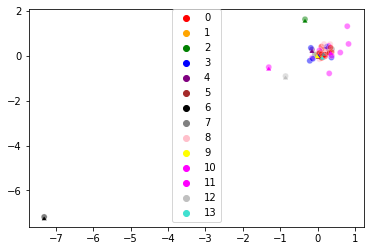

In [56]:
colores = ['red', 'orange', 'green', 'blue', 'purple', 'brown', 'black', 'grey', 'pink', 'yellow', 'magenta', 'fuchsia', 'silver', 'turquoise']
g = sns.scatterplot(x = stock_data_normalizado[:,2], y = stock_data_normalizado[:, 3], hue = kmeans.labels_, palette = colores, alpha = 0.5)
g = sns.scatterplot(x = kmeans.cluster_centers_[:,2], y = kmeans.cluster_centers_[:,3], zorder = 10, palette = colores, hue = [0, 1, 2,3,4,5,6,7,8,9,10,11,12,13], legend = False, marker=6, s=20)

In [57]:
print(kmeans.inertia_ )

7744.968088325987


     K       Inercia
0    1  57780.000000
1    2  38971.711993
2    3  28677.700172
3    4  19607.487209
4    5  14497.336185
5    6  11625.157876
6    7   9428.822991
7    8  16389.815694
8    9  16111.529346
9   10  15973.771508
10  11  15591.408686
11  12  15336.315374
12  13   7850.753829
13  14   7744.968088
14  15   7601.482437
15  16   7200.656577
16  17   6424.606661
17  18   6216.726351
18  19   6085.723932
19  20   5805.468404


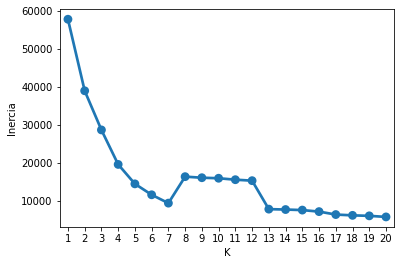

In [55]:
from sklearn.cluster import KMeans
import seaborn as sns

def probar_k(df, max):
    k = 0
    datos = {"K": [], "Inercia": []}
    valores_k = []
    valores_incercia = []

    while k < max:
        k += 1
        kmeans = KMeans(n_clusters = k, init="random", n_init=10, max_iter=300, random_state=123457)
        kmeans.fit(df)
        inercia = kmeans.inertia_ 
        valores_k.append(k)
        valores_incercia.append(inercia)
        
    datos["K"] = valores_k
    datos["Inercia"] = valores_incercia

    k_vs_inertia = pd.DataFrame(datos)
    print(k_vs_inertia)
    
    inertia_vs_k = sns.pointplot(data = k_vs_inertia, x="K", y="Inercia")
    inertia_vs_k

probar_k(stock_data_normalizado, 20)

In [20]:
from sklearn.metrics import silhouette_samples, silhouette_score #Para el coeficiente de silhouette
#Calculamos el promedio del silhouette de todos
silhouette_avg = silhouette_score(stock_data_normalizado, kmeans.labels_)
#Calculamos el silhouette de cada punto
sample_silhouette_values = silhouette_samples(stock_data_normalizado, kmeans.labels_)

In [58]:
def graficarSilhouette (k, labels, sample_silhouette_values, silhouette_avg):
  fig, ax1 = plt.subplots(1, 1)
  y_lower = 10
  for i in range(k):
      ith_cluster_silhouette_values = \
          sample_silhouette_values[labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / k)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
      y_lower = y_upper + 10

  ax1.set_title("Plot del silhouette de cada cluster")
  ax1.set_xlabel("Coeficiente de silhouette")
  ax1.set_ylabel("Etiqueta del cluster")
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax1.set_yticks([]) 

In [61]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm #Para graficar el silhouette
import numpy as np
from sklearn.cluster import KMeans


k = 14
kmeans = KMeans(n_clusters = k, init="random", n_init=10, max_iter=300, random_state=123457) 
kmeans.fit(stock_data_normalizado)


#Mientas mas cercano a 1 mas cercanos son los grupos, mas cohesivos. Raya es el promedio
#qué tan bien se ha clasificado cada objeto
# esta dando negativo

KMeans(init='random', n_clusters=14, random_state=123457)

 Si la mayoría de los objetos tienen un valor alto, entonces la configuración del cúmulo es apropiada. Si muchos puntos tienen un valor bajo o negativo, entonces la configuración de cúmulos puede tener demasiados o muy pocos cúmulos.

lo hago con k = 5 para ver si se acerca, el coficiente de silhouette, a 1 o por lo menos a ser positivo. Con K= 14 teniamos demasiados cumulos.


In [62]:
from sklearn.cluster import KMeans


k = 5
kmeans = KMeans(n_clusters = k, init="random", n_init=10, max_iter=300, random_state=123457)
kmeans.fit(stock_data_normalizado)

kmeans.labels_
kmeans.cluster_centers_

array([[ 3.98395916e-02,  2.69547722e-02,  1.81203449e-01, ...,
         1.11665445e-01, -5.64488532e-02,  5.47955158e-03],
       [ 4.49619702e-01, -3.80380844e-01, -1.30603921e+00, ...,
        -2.51168159e+00,  6.12202625e-01, -5.74259972e+00],
       [-7.08444887e-01, -4.15444534e+00, -7.31794742e+00, ...,
        -6.44373462e+00, -5.24724241e-01,  4.87561300e+00],
       [ 9.32846555e-02,  2.69481600e+00, -5.96392543e-01, ...,
         1.67737718e+00, -1.56872717e+00,  4.67025326e-01],
       [-2.11892166e+00, -2.33731828e+00, -1.49417971e-01, ...,
        -5.40937610e-01,  6.15466288e+00, -3.68439265e-01]])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker (6).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


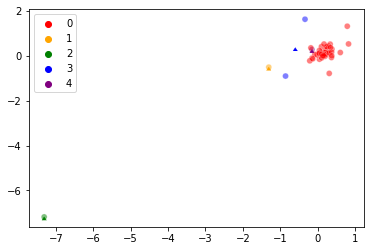

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ['red', 'orange', 'green', 'blue', 'purple']
g = sns.scatterplot(x = stock_escalado[:,2], y = stock_escalado[:, 3], hue = kmeans.labels_, palette=colors, alpha = 0.5)
g = sns.scatterplot(x = kmeans.cluster_centers_[:,2], y = kmeans.cluster_centers_[:,3], zorder = 10, palette=colors, hue = [0,1, 2,3,4], legend = False, marker=6, s=20)

plt.savefig('kmean1.png')

In [25]:
from sklearn.metrics import silhouette_samples, silhouette_score 

silhouette_avg = silhouette_score(stock_data_normalizado, kmeans.labels_)
sample_silhouette_values = silhouette_samples(stock_data_normalizado, kmeans.labels_)

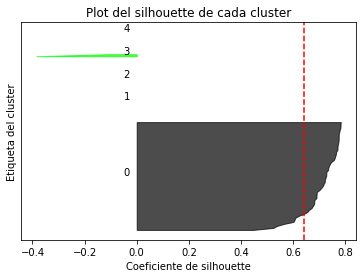

In [67]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.cluster import KMeans


k = 5
kmeans = KMeans(n_clusters = k, init="random", n_init=10, max_iter=300, random_state=123457) 
kmeans.fit(stock_escalado)
graficarSilhouette (k, kmeans.labels_, sample_silhouette_values, silhouette_avg)

AxesSubplot(0.125,0.125;0.775x0.755)


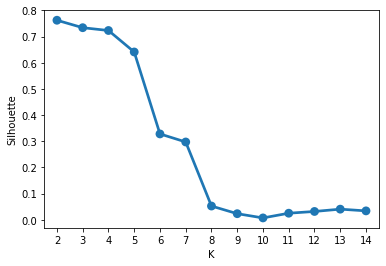

In [27]:
from sklearn.cluster import KMeans

def probar_silhouette(df, max):
    k = 1
    datos = {"K": [], "Silhouette": []}
    valores_k = []
    valores_silhouette = []

    while k < max:
        k += 1
        kmeans = KMeans(n_clusters = k, init="random", n_init=10, max_iter=300, random_state=123457)
        kmeans.fit(df)

        silhouette_avg = silhouette_score(df, kmeans.labels_)

        valores_k.append(k)
        valores_silhouette.append(silhouette_avg)
        
    datos["K"] = valores_k
    datos["Silhouette"] = valores_silhouette
    k_vs_silhouette = pd.DataFrame(datos)
    k_vs_silhouette


    silhouette_vs_k = sns.pointplot(data = k_vs_silhouette, x="K", y="Silhouette")
    print(silhouette_vs_k)


probar_silhouette(stock_data_normalizado, 14)